In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


# New Section

In [ ]:
#data collection and analysis
#loading the data from csv file to a pandas dataframe
insurance_dataset=pd.read_csv('/content/insurance.csv')
insurance_dataset.tail()


,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
insurance_dataset.shape

(1338, 7)

In [ ]:
insurance_dataset.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [ ]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 700x700 with 0 Axes>

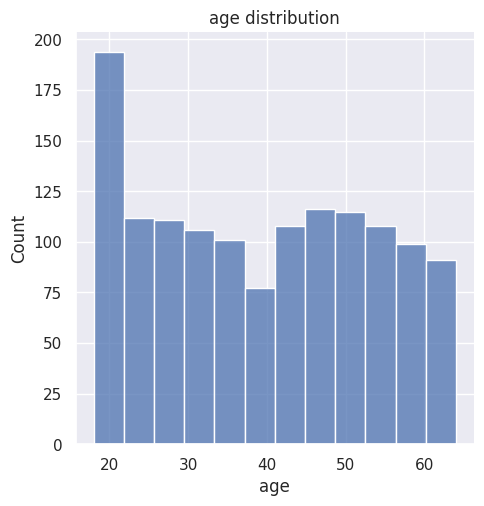

In [ ]:
sns.set()
plt.figure(figsize=(7,7))
sns.displot(insurance_dataset['age'])
plt.title('age distribution')
plt.show()



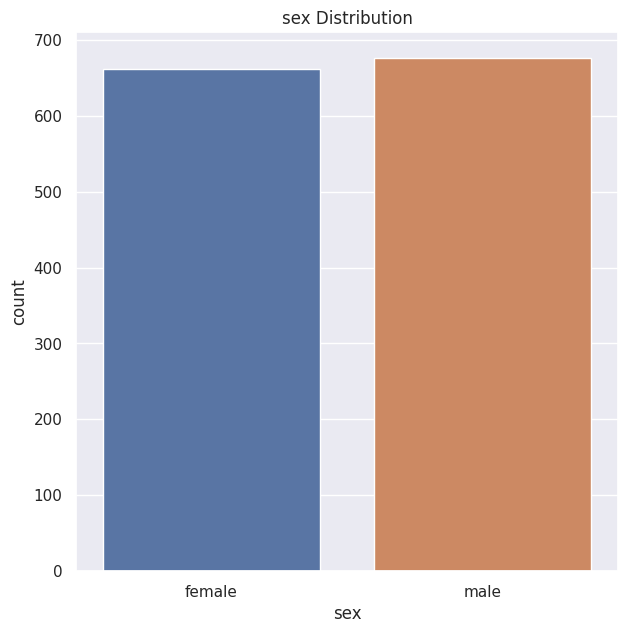

In [ ]:
plt.figure(figsize=(7,7))
sns.countplot(x='sex',data=insurance_dataset)
plt.title('sex Distribution')
plt.show()

In [ ]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<Figure size 700x700 with 0 Axes>

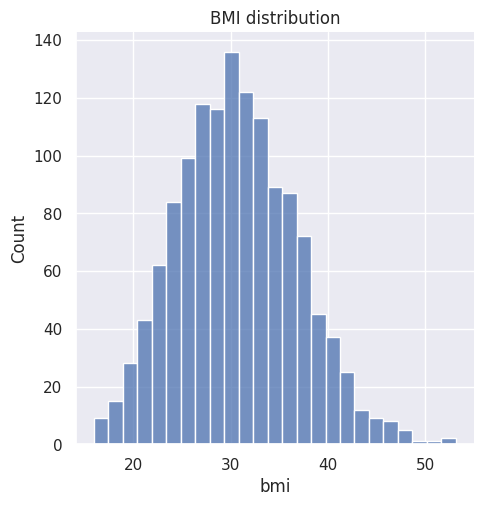

In [ ]:
plt.figure(figsize=(7,7))
sns.displot(insurance_dataset['bmi'])
plt.title('BMI distribution')
plt.show()


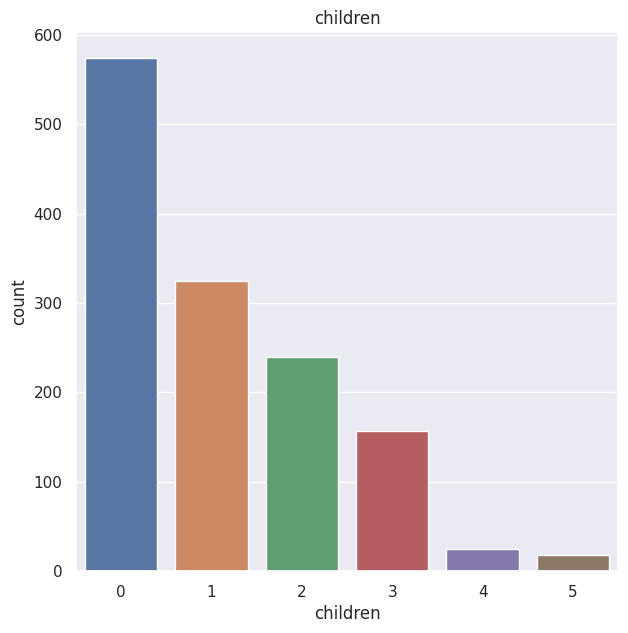

In [ ]:
plt.figure(figsize=(7,7))
sns.countplot(x='children',data=insurance_dataset)
plt.title('children')
plt.show()

In [ ]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

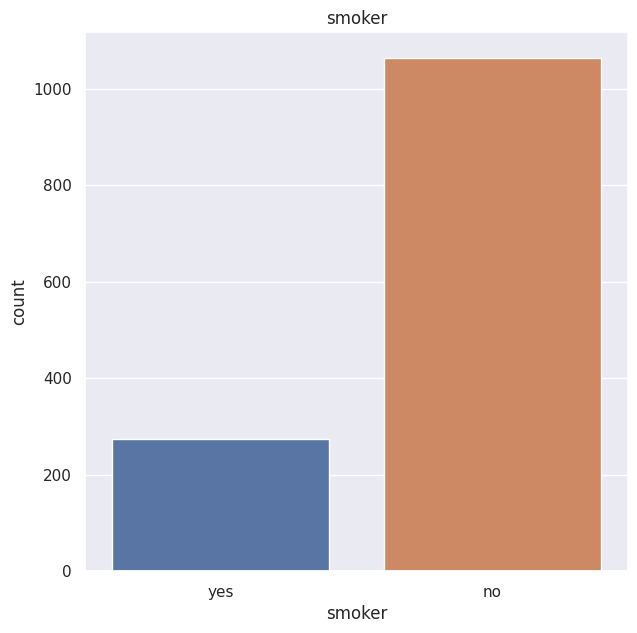

In [ ]:
plt.figure(figsize=(7,7))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title('smoker')
plt.show()

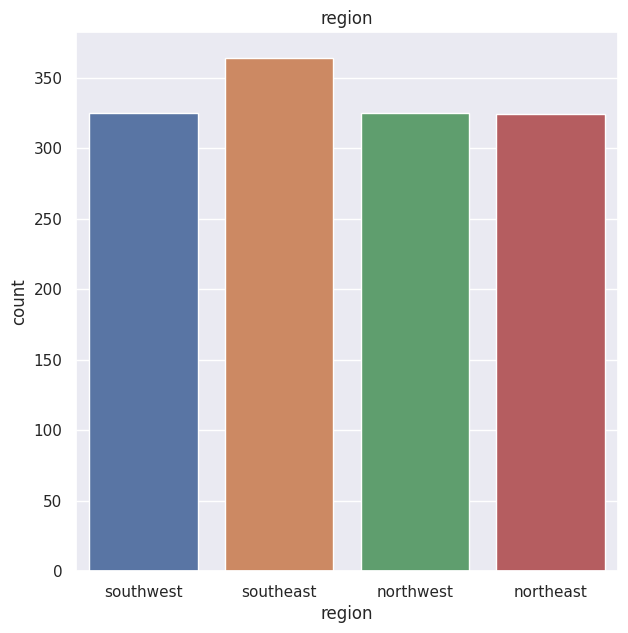

In [ ]:
plt.figure(figsize=(7,7))
sns.countplot(x='region',data=insurance_dataset)
plt.title('region')
plt.show()

In [ ]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<Figure size 700x700 with 0 Axes>

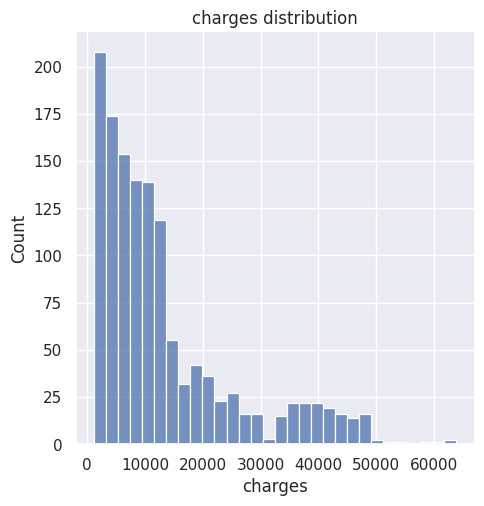

In [ ]:

plt.figure(figsize=(7,7))
sns.displot(insurance_dataset['charges'])
plt.title('charges distribution')
plt.show()



In [ ]:
insurance_dataset.shape

(1338, 7)

In [ ]:
insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)
insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)



In [ ]:
X=insurance_dataset.drop(columns='charges',axis=1)
Y=insurance_dataset['charges']

In [ ]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [ ]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


splitting the data into training data and testing data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


model training

linear regression

In [ ]:
#loading the linear regression model
regressor=LinearRegression()


In [ ]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [ ]:
#prediction on trainig data
training_data_prediction=regressor.predict(X_train)

In [ ]:
#R squared value
r2_train = metrics.r2_score(Y_train,training_data_prediction)
print('R squared value :',r2_train)

R squared value : 0.751505643411174


In [ ]:
#prediction on trainig data
training_data_prediction=regressor.predict(X_test)

In [ ]:
#R squared value
r2_test = metrics.r2_score(Y_test,training_data_prediction)
print('R squared value :',r2_test)

R squared value : 0.7447273869684076


building a predictive system

In [ ]:
input_data = (25,0,26.22,0,1,2)
#changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

[2808.687798]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
